In [ ]:
# ---------------------- Q1: House Price Prediction ----------------------

# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2. Load dataset
df1 = pd.read_csv('Q1.csv')
print("Dataset (Q1) Preview:")
display(df1.head())

# 3. Features & target (corrected column names)
X1 = df1[['Size_sqft', 'Bedrooms', 'Age_years']]
y1 = df1['HousePrice']

# 4. Split into train/test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 5. Train model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# 6. Print coefficients
print("\nCoefficients for Q1:")
for feature, coef in zip(X1.columns, model1.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model1.intercept_}")

# 7. Predict example
pred1 = model1.predict([[1200, 2, 8]])
print(f"\nPredicted Price (1200 sqft, 2 bedrooms, 8 yrs): {pred1[0]}")


Dataset (Q1) Preview:


Size_sqft  Bedrooms  Age_years  HousePrice
0       1900         2         15     3000000
1       2000         3         16     3100000
2       2100         4         17     3200000
3       1200         2          8     2100000
4       1300         3          9     2200000


Coefficients for Q1:
Size_sqft: 1291.2954265948933
Bedrooms: 7124.179457178733
Age_years: 12.912954265949338
Intercept: 476997.2989289346

Predicted Price (1200 sqft, 2 bedrooms, 8 yrs): 2040903.4733912917


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Dataset (Q2) Preview:


HoursStudy  HoursSleep  Attendance  Marks
0           7           8          87     86
1           8           7          86     88
2           9           6          95     90
3           8           7          94     88
4           7           8          93     86

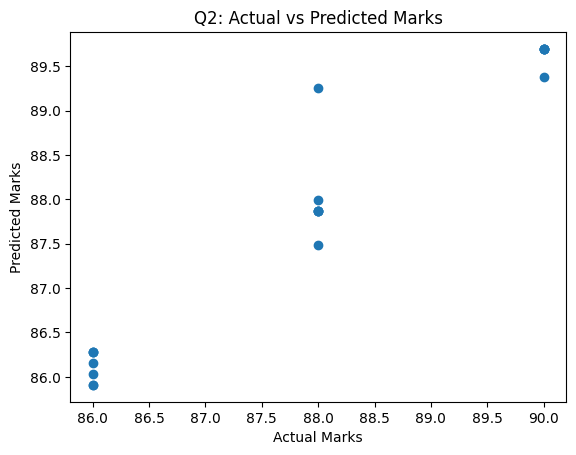


R² Score (Q2): 0.9412476337324883
Mean Squared Error (Q2): 0.15216862863285513


In [ ]:
# ---------------------- Q2: Student Performance ----------------------

# 1. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 2. Load dataset
df2 = pd.read_csv('Q2.csv')
print("Dataset (Q2) Preview:")
display(df2.head())

# 3. Features and target
X2 = df2[['HoursStudy', 'HoursSleep', 'Attendance']]
y2 = df2['Marks']

# 4. Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 5. Train model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# 6. Predict on test set
y2_pred = model2.predict(X2_test)

# 7. Plot Actual vs Predicted
plt.scatter(y2_test, y2_pred)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Q2: Actual vs Predicted Marks')
plt.show()

# 8. R² Score and Mean Squared Error
print("\nR² Score (Q2):", r2_score(y2_test, y2_pred))
print("Mean Squared Error (Q2):", mean_squared_error(y2_test, y2_pred))


Dataset (Q3) Preview:


HoursStudy  HoursSleep  Pass
0           7           5     0
1           9           7     1
2           9           7     1
3           8           6     1
4           7           5     0


Probability of Passing (30 hrs study, 6 hrs sleep): 1.0


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


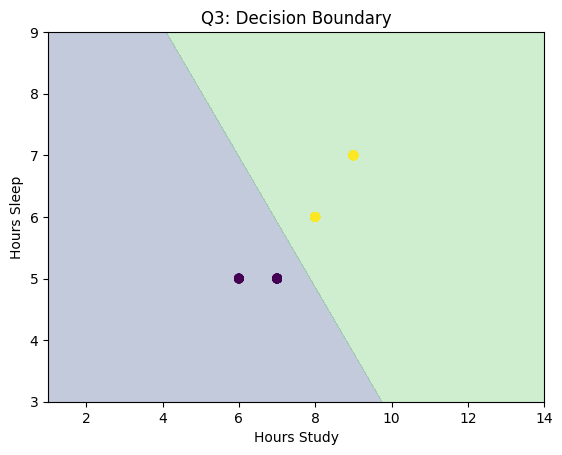

In [ ]:
# ---------------------- Q3: Pass/Fail Classification ----------------------

# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 2. Load dataset
df3 = pd.read_csv('Q3.csv')
print("Dataset (Q3) Preview:")
display(df3.head())

# 3. Features and target
X3 = df3[['HoursStudy', 'HoursSleep']]
y3 = df3['Pass']

# 4. Train-test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# 5. Train logistic regression model
model3 = LogisticRegression()
model3.fit(X3_train, y3_train)

# 6. Predict probability for a student (30 hrs study, 6 hrs sleep)
prob_pass = model3.predict_proba([[30, 6]])[0][1]
print(f"\nProbability of Passing (30 hrs study, 6 hrs sleep): {prob_pass}")

# 7. Plot decision boundary
x_min, x_max = X3['HoursStudy'].min() - 5, X3['HoursStudy'].max() + 5
y_min, y_max = X3['HoursSleep'].min() - 2, X3['HoursSleep'].max() + 2

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
probs = model3.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(df3['HoursStudy'], df3['HoursSleep'], c=df3['Pass'])
plt.xlabel('Hours Study')
plt.ylabel('Hours Sleep')
plt.title('Q3: Decision Boundary')
plt.show()


In [ ]:
# ---------------------- Q4: Diabetes Prediction ----------------------

# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 2. Load dataset
df4 = pd.read_csv('Q4.csv')
print("Dataset (Q4) Preview:")
display(df4.head())

# 3. Features and target
X4 = df4[['BMI', 'Age', 'Glucose']]
y4 = df4['Diabetic']

# 4. Train-test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# 5. Train logistic regression model
model4 = LogisticRegression()
model4.fit(X4_train, y4_train)

# 6. Predictions on test set
y4_pred = model4.predict(X4_test)

# 7. Metrics
print("\nAccuracy:", accuracy_score(y4_test, y4_pred))
print("Precision:", precision_score(y4_test, y4_pred))
print("Recall:", recall_score(y4_test, y4_pred))

# 8. Predict new patient
new_patient = [[28, 45, 150]]  # BMI, Age, Glucose
prediction = model4.predict(new_patient)[0]
print(f"\nPrediction (BMI=28, Age=45, Glucose=150): {'Diabetic' if prediction==1 else 'Not Diabetic'}")


Dataset (Q4) Preview:


BMI  Age  Glucose  Diabetic
0   30   48      165         1
1   25   33      130         0
2   25   25      111         0
3   24   45      161         1
4   22   35      171         1


Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Prediction (BMI=28, Age=45, Glucose=150): Diabetic


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# ---------------------- Q5: Linear vs Logistic Regression ----------------------

# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

# 2. Load dataset
df5 = pd.read_csv('Q5.csv')
print("Dataset (Q5) Preview:")
display(df5.head())

# ------------------ PART 1: Linear Regression to predict ExamScore ------------------
X_lin = df5[['HoursStudy']]
y_lin = df5['ExamScore']

# Split
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Train model
lin_model = LinearRegression()
lin_model.fit(X_lin_train, y_lin_train)

# Predict
y_lin_pred = lin_model.predict(X_lin_test)

# Evaluate
mse = mean_squared_error(y_lin_test, y_lin_pred)
print("\n--- Linear Regression Results (Exam Score Prediction) ---")
print("MSE:", mse)
print("Coefficient:", lin_model.coef_[0])
print("Intercept:", lin_model.intercept_)

# ------------------ PART 2: Logistic Regression to predict Pass/Fail ------------------
X_log = df5[['HoursStudy']]
y_log = df5['Pass']

# Split
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Train model
log_model = LogisticRegression()
log_model.fit(X_log_train, y_log_train)

# Predict
y_log_pred = log_model.predict(X_log_test)

# Evaluate
acc = accuracy_score(y_log_test, y_log_pred)
print("\n--- Logistic Regression Results (Pass/Fail Prediction) ---")
print("Accuracy:", acc)
print("Coefficient:", log_model.coef_[0][0])
print("Intercept:", log_model.intercept_[0])

# ------------------ PART 3: Explanation ------------------
print("\n--- Why Linear Regression is not suitable for classification? ---")
print("""
Linear Regression outputs continuous values (like 0.7, 1.4, -0.3), not probabilities or classes.
It has no decision boundary and predictions may exceed the 0-1 range.
Logistic Regression is designed for classification — it outputs probabilities between 0 and 1
and applies a threshold (e.g., 0.5) for class prediction.
""")


Dataset (Q5) Preview:


HoursStudy  ExamScore  Pass
0           9         90     1
1           8         88     1
2           7         86     0
3           9         88     1
4           8         86     1


--- Linear Regression Results (Exam Score Prediction) ---
MSE: 2.999717107076564
Coefficient: 0.04279003555818472
Intercept: 86.79945231362515

--- Logistic Regression Results (Pass/Fail Prediction) ---
Accuracy: 0.85
Coefficient: -0.06644719468972314
Intercept: 1.6755718751777788

--- Why Linear Regression is not suitable for classification? ---

Linear Regression outputs continuous values (like 0.7, 1.4, -0.3), not probabilities or classes.
It has no decision boundary and predictions may exceed the 0-1 range.
Logistic Regression is designed for classification — it outputs probabilities between 0 and 1
and applies a threshold (e.g., 0.5) for class prediction.

